ref: https://github.com/OlenaKulchytska/ComputerVision/blob/main/Lab2/Lab2_CV.ipynb

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import argparse
import math
import cv2
from skimage.feature import hog

In [125]:
def show_image(img: np.ndarray):
    plt.figure(figsize=(20, 20))
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.show()

In [126]:
def hog_detect(img):
    gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    
    descriptions = hog(
        gray_img.reshape(*gray_img.shape, 1),
        orientations=8,
        pixels_per_cell=(16, 16),
        cells_per_block=(1, 1),
        channel_axis=-1, 
        feature_vector=False
    )
    keypoints = generate_kp(*gray_img.shape, *descriptions.shape[:2])
    descriptions = descriptions.reshape(descriptions.shape[0]*descriptions.shape[1], -1)
    return keypoints, descriptions.astype(np.float32)

In [127]:
def generate_kp(h, w, ph, pw):
    h_step = h / ph
    w_step = w / pw
    current_h = 0
    kp = []
    while current_h < h - h_step/2:
        current_w = 0
        while current_w < w - w_step/2:
            kp.append(cv.KeyPoint(int(current_w + w_step/2), int(current_h + h_step/2), size=1))
            current_w += w_step
        current_h += h_step
    return kp

In [128]:
def brute_force_opencv_matcher(kps1, des1, kps2, des2,img1, img2):
    bf = cv.BFMatcher(crossCheck=True)
    matches = bf.match(descs1, descs2)
    
    matches = sorted(matches, key = lambda x:x.distance)
    good = []
    for m in matches[:20]:
        good.append([m])

    return cv.drawMatchesKnn(img1, kps1, img2, kps2, good, None, flags=2)

In [129]:
book = cv.imread('data/book.png')
books = cv.imread('data/books.png')

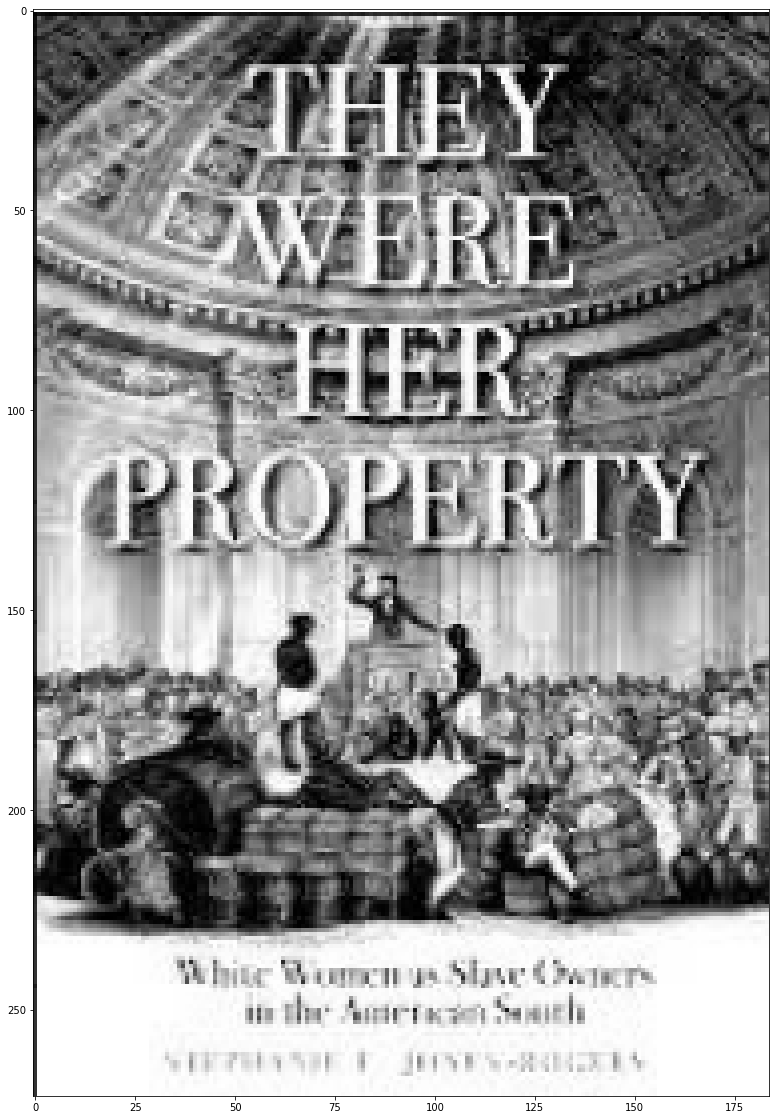

In [130]:
show_image(book)

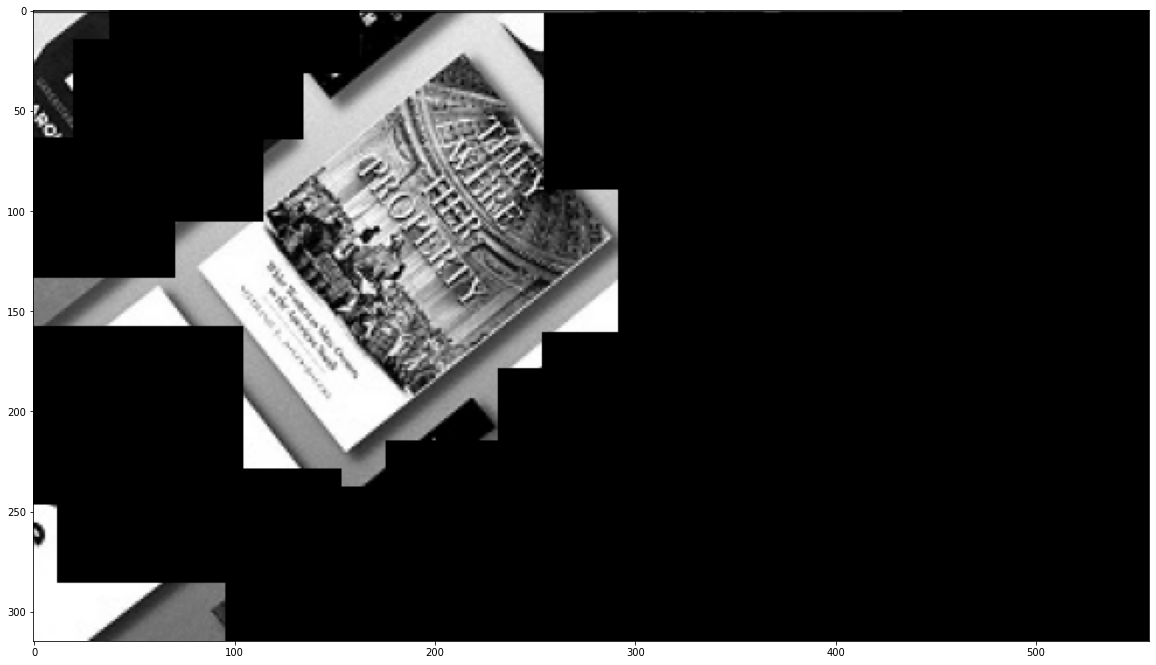

In [131]:
show_image(books)

In [132]:
kps1, descs1, kps2, descs2 = *hog_detect(book), *hog_detect(books)

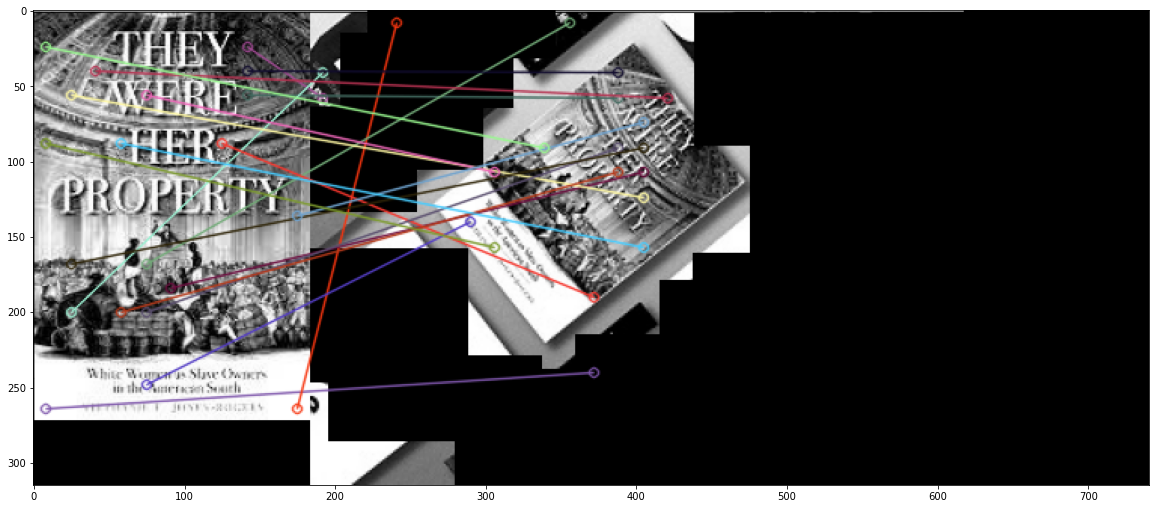

In [133]:
show_image(brute_force_opencv_matcher(kps1, descs1, kps2, descs2, book, books))